In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f1 = pd.read_csv('Dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
f2 = pd.read_csv('Dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
f3 = pd.read_csv('Dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv')
f4 = pd.read_csv('Dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv')
f5 = pd.read_csv('Dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
f6 = pd.read_csv('Dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
f7 = pd.read_csv('Dataset/Tuesday-WorkingHours.pcap_ISCX.csv')
f8 = pd.read_csv('Dataset/Wednesday-workingHours.pcap_ISCX.csv')

In [3]:
combine_df = pd.concat([f1], ignore_index=True)

In [4]:
combine_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
combine_df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
combine_df[' Label'].value_counts().sum

<bound method Series.sum of  Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64>

In [7]:
encoder = LabelEncoder()
combine_df[' Label']= encoder.fit_transform(combine_df[' Label'])

In [8]:
combine_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [9]:
df = combine_df.fillna(0)  # Replace NaN with 0
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [10]:
nan_mask = df.isna()
print("NaNs in DataFrame:\n", df[nan_mask].sum())

# Check for infinities
inf_mask = df.isin([np.inf, -np.inf])
print("Infs in DataFrame:\n", df[inf_mask].sum())

NaNs in DataFrame:
  Destination Port              0.0
 Flow Duration                 0.0
 Total Fwd Packets             0.0
 Total Backward Packets        0.0
Total Length of Fwd Packets    0.0
                              ... 
Idle Mean                      0.0
 Idle Std                      0.0
 Idle Max                      0.0
 Idle Min                      0.0
 Label                         0.0
Length: 79, dtype: float64
Infs in DataFrame:
  Destination Port              0.0
 Flow Duration                 0.0
 Total Fwd Packets             0.0
 Total Backward Packets        0.0
Total Length of Fwd Packets    0.0
                              ... 
Idle Mean                      0.0
 Idle Std                      0.0
 Idle Max                      0.0
 Idle Min                      0.0
 Label                         0.0
Length: 79, dtype: float64


In [11]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
df.fillna(0, inplace=True)

In [12]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [14]:
df=df.astype(int)
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
1,55054,109,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
2,55055,52,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
3,46236,34,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
4,54863,3,2,0,12,0,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
225741,61378,72,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
225742,61375,75,1,1,6,6,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0
225743,61323,48,2,0,12,0,6,6,6,0,...,20,0,0,0,0,0,0,0,0,0


In [15]:
X = df.drop(' Label',axis=1)
y = df[' Label']

In [16]:
X, y

(         Destination Port   Flow Duration   Total Fwd Packets  \
 0                   54865               3                   2   
 1                   55054             109                   1   
 2                   55055              52                   1   
 3                   46236              34                   1   
 4                   54863               3                   2   
 ...                   ...             ...                 ...   
 225740              61374              61                   1   
 225741              61378              72                   1   
 225742              61375              75                   1   
 225743              61323              48                   2   
 225744              61326              68                   1   
 
          Total Backward Packets  Total Length of Fwd Packets  \
 0                             0                           12   
 1                             1                            6   
 2         

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[ 2.32783109, -0.51521027, -0.18640643, ..., -0.28313719,
        -0.47836378, -0.39107132],
       [ 2.33739848, -0.51520691, -0.25124533, ..., -0.28313719,
        -0.47836378, -0.39107132],
       [ 2.3374491 , -0.51520872, -0.25124533, ..., -0.28313719,
        -0.47836378, -0.39107132],
       ...,
       [ 2.65737453, -0.51520799, -0.25124533, ..., -0.28313719,
        -0.47836378, -0.39107132],
       [ 2.65474223, -0.51520885, -0.18640643, ..., -0.28313719,
        -0.47836378, -0.39107132],
       [ 2.65489409, -0.51520821, -0.25124533, ..., -0.28313719,
        -0.47836378, -0.39107132]])

In [19]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Determine the number of columns (features) in your DataFrame
num_columns = df.shape[1]

# Set an appropriate value for k (less than or equal to the number of columns)
k = min(10, num_columns)  # Adjust this as needed

# Initialize SelectKBest with the scoring function
k_best = SelectKBest(score_func=f_classif, k=k)

# Fit and transform the imputed data to select the top 10 features
X_new = k_best.fit_transform(X_imputed, y)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [31 32 33 49 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [20]:
selected_features_mask = k_best.get_support()
selected_features_mask 

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [21]:
elected_feature_names = X.columns[selected_features_mask]
elected_feature_names

Index([' Destination Port', 'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Min Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' URG Flag Count', ' Average Packet Size',
       ' Avg Bwd Segment Size'],
      dtype='object')

In [22]:
new_columns=[' Destination Port', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packets/s', ' Min Packet Length',
       ' PSH Flag Count', ' URG Flag Count', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' min_seg_size_forward']

In [23]:
df_new=X[new_columns]
df_new

,Destination Port,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packets/s,Min Packet Length,PSH Flag Count,URG Flag Count,Avg Fwd Segment Size,Avg Bwd Segment Size,min_seg_size_forward
0,54865,0,0,0,6,0,0,6,0,20
1,55054,6,6,9174,6,0,1,6,6,20
2,55055,6,6,19230,6,0,1,6,6,20
3,46236,6,6,29411,6,0,1,6,6,20
4,54863,0,0,0,6,0,0,6,0,20
...,...,...,...,...,...,...,...,...,...,...
225740,61374,6,6,16393,6,0,1,6,6,20
225741,61378,6,6,13888,6,0,1,6,6,20
225742,61375,6,6,13333,6,0,1,6,6,20
225743,61323,0,0,0,6,0,0,6,0,20


In [24]:
df_new['label']=df[' Label']
df_new['label']

C:\Users\HP\AppData\Local\Temp\ipykernel_2828\1275674953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['label']=df[' Label']


0         0
1         0
2         0
3         0
4         0
         ..
225740    0
225741    0
225742    0
225743    0
225744    0
Name: label, Length: 225745, dtype: int32

In [25]:
X1=df_new.iloc[:,:-1].values
y1=df_new.iloc[:,-1].values

In [26]:
X1, y1

(array([[54865,     0,     0, ...,     6,     0,    20],
        [55054,     6,     6, ...,     6,     6,    20],
        [55055,     6,     6, ...,     6,     6,    20],
        ...,
        [61375,     6,     6, ...,     6,     6,    20],
        [61323,     0,     0, ...,     6,     0,    20],
        [61326,     6,     6, ...,     6,     6,    20]]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [40]:
def generate_synthetic_data(num_samples, seq_length):
    X = np.linspace(0, 100, num_samples)
    y = np.sin(X) + np.random.normal(scale=0.5, size=X.shape)  # Sine wave with noise
    return y

In [41]:
num_samples = 1000
seq_length = 10
data = generate_synthetic_data(num_samples, seq_length)

In [42]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)


In [43]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

In [44]:
X, y = create_sequences(data_scaled, seq_length)

In [45]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [46]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [48]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1325 - val_loss: 0.0179
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0228 - val_loss: 0.0165
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0183 - val_loss: 0.0151
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0186 - val_loss: 0.0151
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0200 - val_loss: 0.0147
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0197 - val_loss: 0.0178
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0195 - val_loss: 0.0150
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0202 - val_loss: 0.0142
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0185 - val_loss: 0.0141
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0182 - val_loss: 0.0143
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0180 - val_loss: 0.0140
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

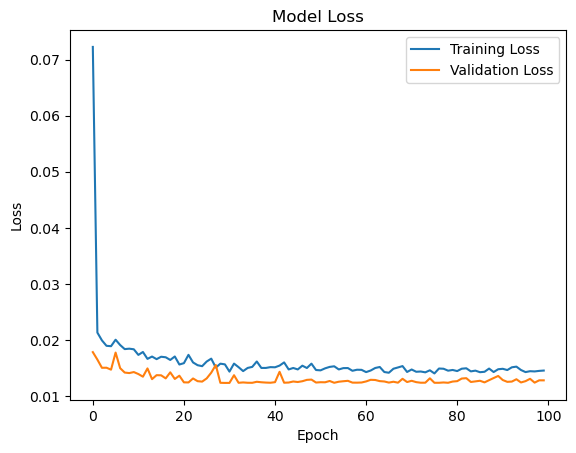

In [49]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [50]:
predictions = model.predict(X)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [51]:
predictions = scaler.inverse_transform(predictions)

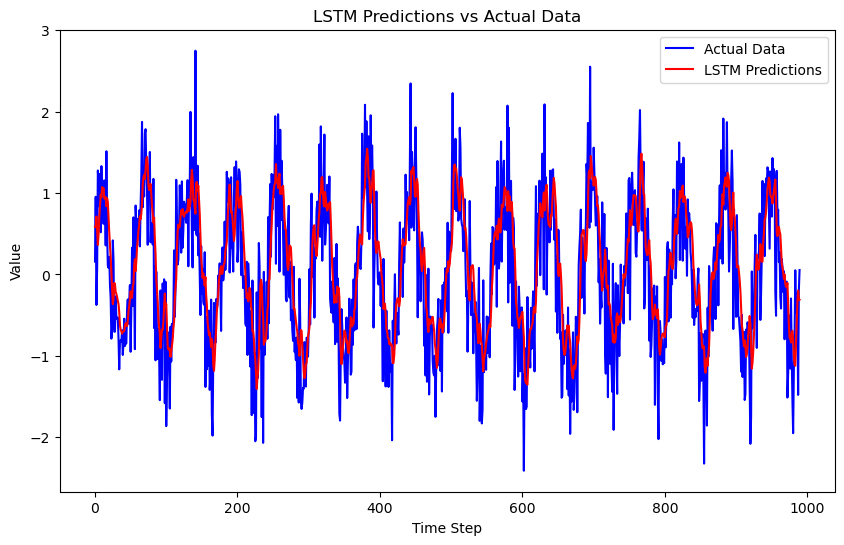

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(data[seq_length:], label='Actual Data', color='blue')
plt.plot(predictions, label='LSTM Predictions', color='red')
plt.title('LSTM Predictions vs Actual Data')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(data[seq_length:], predictions)
rmse = np.sqrt(mean_squared_error(data[seq_length:], predictions))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.48303649507432495
Root Mean Squared Error (RMSE): 0.6044388283377368


Epoch 1/100


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.5432 - loss: 0.6920 - val_accuracy: 0.7020 - val_loss: 0.6697
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7186 - loss: 0.6445 - val_accuracy: 0.7475 - val_loss: 0.5508
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7382 - loss: 0.5553 - val_accuracy: 0.7374 - val_loss: 0.5300
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7844 - loss: 0.5244 - val_accuracy: 0.7576 - val_loss: 0.5169
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7705 - loss: 0.4977 - val_accuracy: 0.7576 - val_loss: 0.5109
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7587 - loss: 0.5085 - val_accuracy: 0.7576 - val_loss: 0.5125
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7431 - loss: 0.5187 - val_accuracy: 0.7727 - val_loss: 0.4822
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7760 - loss: 0.5084 - val_accuracy: 0.7576 - val_loss

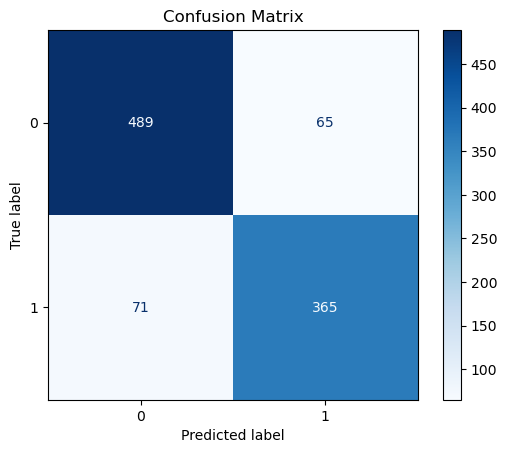

Accuracy: 0.86


In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Generate synthetic data for demonstration
def generate_synthetic_data(num_samples):
    X = np.linspace(0, 100, num_samples)
    y = np.sin(X) + np.random.normal(scale=0.5, size=X.shape)  # Sine wave with noise
    return y

# Load your data
num_samples = 1000
seq_length = 10
data = generate_synthetic_data(num_samples)

# Prepare the dataset
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

# Create sequences
X, y = create_sequences(data_scaled, seq_length)

# Classify the data: Let's say anything above 0.5 is class 1 and below or equal to 0.5 is class 0
y_classes = (y > 0.5).astype(int)  # Convert to binary classification

# Reshape for LSTM input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y_classes, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
predictions = model.predict(X)
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to class labels

# Calculate the confusion matrix
cm = confusion_matrix(y_classes, predicted_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0, 1])

# Plot the confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_classes, predicted_classes)
print(f'Accuracy: {accuracy:.2f}')
